In [76]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# 1. 데이터 가져오기 및 전처리

In [77]:
# 배추 데이터 가져오기
raw_cabbage = pd.read_csv('C:/sa/cabbage.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_cabbage[col] = raw_cabbage[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_cabbage[columns_to_convert] = raw_cabbage[columns_to_convert].apply(pd.to_numeric, errors='coerce')

raw_cabbage.head()

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.0,0.7,3.5,4.9,13.0,943,407.0,239150,268976921850,44000,23372490,211567000.0
1,14-Feb,1071.0,1.9,6.6,1.8,16.2,892,357.0,354935,210467565,0,0,211567000.0
2,14-Mar,1071.0,7.9,13.1,3.5,7.2,786,310.0,968363,497062881,0,0,211567000.0
3,14-Apr,1045.0,14.0,19.6,9.4,31.0,796,307.0,1525647,870870605,24000,12497155,211567000.0
4,14-May,1025.0,18.9,25.3,13.8,63.0,736,283.0,3135569,1669132550,0,0,211567000.0


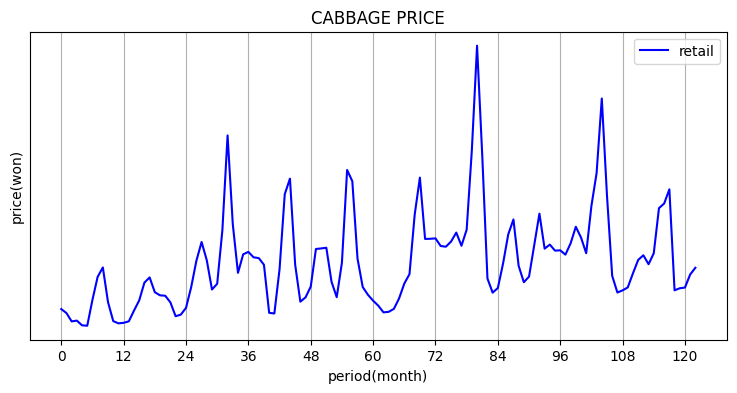

In [78]:
# 배추 분포 확인하기
plt.figure(figsize = (9, 4))
plt.title('CABBAGE PRICE')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
# x축을 12씩 표시, y축을 500단위로 표시
plt.xticks(range(0, 121, 12))
plt.yticks(range(0, 000, 500))

# 이제 데이터 추가
plt.plot(raw_cabbage['retailPrice'], label='retail', color='b')
plt.legend(loc = 'best')
# 출력
plt.show()

In [79]:
# 최솟값이 0인 열이 있는지 확인
for col in raw_cabbage.columns:

    if raw_cabbage[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

rainfall <class 'str'>
exportVolume <class 'str'>
exportValue <class 'str'>
importVolume <class 'str'>
importValue <class 'str'>
production <class 'str'>


In [80]:
# 각 column에 0 몇개인지 확인
for col in raw_cabbage.columns:

    missing_rows = raw_cabbage.loc[raw_cabbage[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 2
retailPrice: 0
wholesalePrice: 0
exportVolume: 1
exportValue: 1
importVolume: 68
importValue: 68
production: 3


In [81]:
# 최솟값이 0인 열의 행 출력
raw_cabbage.loc[(raw_cabbage['rainfall'] == 0) | 
                (raw_cabbage['wholesalePrice'] == 0) |
                (raw_cabbage['exportVolume'] == 0) | 
                (raw_cabbage['exportValue'] == 0) | 
                (raw_cabbage['importVolume'] == 0) | 
                (raw_cabbage['importValue'] == 0) | 
                (raw_cabbage['production'] == 0)]

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
1,14-Feb,1071.00,1.9,6.6,1.8,16.2,892,357.0,354935,210467565,0,0,211567000.0
2,14-Mar,1071.00,7.9,13.1,3.5,7.2,786,310.0,968363,497062881,0,0,211567000.0
4,14-May,1025.00,18.9,25.3,13.8,63.0,736,283.0,3135569,1669132550,0,0,211567000.0
6,14-Jul,1020.00,26.1,30.6,22.9,207.9,1060,639.0,576890,483739080,0,0,211567000.0
7,14-Aug,1025.00,25.2,29.0,22.1,172.8,1353,665.0,1144727,856513575,0,0,211567000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,23-Nov,1310.00,6.8,11.5,2.9,81.9,1182,NaN,3566024,3103256380,0,0,103534000.0
119,23-Dec,1304.00,1.1,5.2,2.5,85.9,1208,NaN,1394899,1172582880,0,0,103534000.0
120,24-Jan,1323.57,0.5,3.6,3.9,18.9,1217,NaN,1534527,1295502375,0,0,0.0
121,24-Feb,1331.74,3.8,8.2,0.2,74.7,1383,NaN,584282,548206776,0,0,0.0


In [82]:
# 결측치 처리위해 0을 모두 NaN으로 대체
raw_cabbage['rainfall'] = raw_cabbage['rainfall'].replace(0, np.nan)
raw_cabbage['wholesalePrice'] = raw_cabbage['wholesalePrice'].replace(0, np.nan)
raw_cabbage['exportVolume'] = raw_cabbage['exportVolume'].replace(0, np.nan)
raw_cabbage['exportValue'] = raw_cabbage['exportValue'].replace(0, np.nan)
raw_cabbage['importVolume'] = raw_cabbage['importVolume'].replace(0, np.nan)
raw_cabbage['importValue'] = raw_cabbage['importValue'].replace(0, np.nan)
raw_cabbage['production'] = raw_cabbage['production'].replace(0, np.nan)

# NaN으로 잘 바뀌었나 확인
for col in raw_cabbage.columns:
    missing_rows = raw_cabbage.loc[raw_cabbage[col]==0].shape[0]    # 0의 수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [83]:
# 결측치의 개수가 적은 열은 평균값으로 대체
raw_cabbage.loc[np.isnan(raw_cabbage.rainfall)==True, 'rainfall'] = raw_cabbage.rainfall.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.wholesalePrice)==True, 'wholesalePrice'] = raw_cabbage.wholesalePrice.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.exportVolume)==True, 'exportVolume'] = raw_cabbage.exportVolume.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.exportValue)==True, 'exportValue'] = raw_cabbage.exportValue.mean()
raw_cabbage.loc[np.isnan(raw_cabbage.production)==True, 'production'] = raw_cabbage.production.mean()

# 결측치의 개수가 많은 열은 삭제
raw_cabbage.drop(columns=['importVolume'], inplace=True)
raw_cabbage.drop(columns=['importValue'], inplace=True)

# 결측치 제거가 잘 되었나 확인
for col in raw_cabbage.columns:
    missing_rows = raw_cabbage[col].isna().sum()     # NaN 값 개수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
production: 0


In [84]:
# 정규화
# 숫자로 표현되는 모든 column에 대해서 0~1로 정규화를 수행함.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols1 = ['exchangeRate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'production']
# 정규화
scaled_cabbage = scaler.fit_transform(raw_cabbage[scale_cols1])

# numpy형태로 return된 것을 다시 pandas형태로
scaled_cabbage = pd.DataFrame(scaled_cabbage, columns=scale_cols1)
print(scaled_cabbage)


     exchangeRate   avgTemp   maxTemp  minTemp  rainfall  retailPrice  \
0        0.112745  0.017483  0.102410    0.188  0.017786     0.059467   
1        0.127451  0.059441  0.195783    0.064  0.022529     0.045161   
2        0.127451  0.269231  0.391566    0.132  0.009189     0.015428   
3        0.063725  0.482517  0.587349    0.368  0.044464     0.018233   
4        0.014706  0.653846  0.759036    0.544  0.091893     0.001403   
..            ...       ...       ...      ...       ...          ...   
118      0.713235  0.230769  0.343373    0.108  0.119905     0.126508   
119      0.698529  0.031469  0.153614    0.092  0.125834     0.133801   
120      0.746495  0.010490  0.105422    0.148  0.026530     0.136325   
121      0.766520  0.125874  0.243976    0.000  0.109234     0.182889   
122      0.763971  0.230769  0.349398    0.088  0.042834     0.207013   

     wholesalePrice  exportVolume  exportValue  production  
0          0.044413      0.035241     1.000000    1.000000  
1

# 2. feature값 설정

In [111]:
X = scaled_cabbage[['exchangeRate', 'avgTemp', 'maxTemp','minTemp','rainfall', 'wholesalePrice', 'exportVolume','exportValue', 'production']]
y = scaled_cabbage['retailPrice']
X_names = X.columns

X_names

Index(['exchangeRate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall',
       'wholesalePrice', 'exportVolume', 'exportValue', 'production'],
      dtype='object')

### feautre선택방법 1. f_regression

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression

sel_fr = SelectKBest(f_regression, k=4).fit(X, y)    
print('\nf_regression: ') #F-value 회귀

print()
print('Selected features: ', [X_names[i] for i in sel_fr.get_support(indices=True)]) 


f_regression: 

Selected features:  ['exchangeRate', 'avgTemp', 'wholesalePrice', 'exportVolume']


### feature선택방법 2. SFS

In [87]:
# SFS(Sequential Feature Selector) : 순차적으로 특성을 선택하는 방법  
# k 최근접 이웃 회귀 모델

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')

sfs.fit(X,y)

X_selected = sfs.transform(X)
X_selected_names = [X_names[i] for i in sfs.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['maxTemp', 'wholesalePrice', 'exportValue']


### feature선택방법 3. rfe

In [88]:
# 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 반복하는

from sklearn.feature_selection import RFE ,RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

X_selected = selector.transform(X)
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

print(f'{X_selected_names = }')
print()

X_selected_names = ['exchangeRate', 'avgTemp', 'wholesalePrice']



### feature선택방법 4. rfecv

In [89]:
#rfecv를 사용하면 몇개의 feature를 남겨야할지 사용자가 직접 정의할 필요가 없음

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

X_selected = selector.transform(X)
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['exchangeRate', 'avgTemp', 'wholesalePrice']


# 3. feature분석를 바탕으로 학습데이터 선택

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = scaled_cabbage[['exchangeRate', 'avgTemp', 'wholesalePrice']]
y = scaled_cabbage[['retailPrice']]

#학습데이터와 테스트데이터를 7:3으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# 4. LSTM

In [120]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, activation='tanh' ,input_shape=(4, 1)))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.01))  
model.add(Dense(1))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])
model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,001 (50.79 KB)

 Trainable params: 13,001 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# 모델 학습
lstm= model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=2)

Epoch 1/500
9/9 - 2s - 203ms/step - loss: 0.0375 - mae: 0.1355 - val_loss: 0.0130 - val_mae: 0.0901
Epoch 2/500
9/9 - 0s - 9ms/step - loss: 0.0232 - mae: 0.1219 - val_loss: 0.0109 - val_mae: 0.0894
Epoch 3/500
9/9 - 0s - 10ms/step - loss: 0.0213 - mae: 0.1159 - val_loss: 0.0105 - val_mae: 0.0862
Epoch 4/500
9/9 - 0s - 8ms/step - loss: 0.0214 - mae: 0.1085 - val_loss: 0.0112 - val_mae: 0.0852
Epoch 5/500
9/9 - 0s - 7ms/step - loss: 0.0190 - mae: 0.1067 - val_loss: 0.0091 - val_mae: 0.0835
Epoch 6/500
9/9 - 0s - 8ms/step - loss: 0.0191 - mae: 0.1055 - val_loss: 0.0088 - val_mae: 0.0817
Epoch 7/500
9/9 - 0s - 7ms/step - loss: 0.0183 - mae: 0.1023 - val_loss: 0.0087 - val_mae: 0.0798
Epoch 8/500
9/9 - 0s - 7ms/step - loss: 0.0172 - mae: 0.1011 - val_loss: 0.0084 - val_mae: 0.0790
Epoch 9/500
9/9 - 0s - 8ms/step - loss: 0.0167 - mae: 0.1002 - val_loss: 0.0080 - val_mae: 0.0797
Epoch 10/500
9/9 - 0s - 9ms/step - loss: 0.0165 - mae: 0.1015 - val_loss: 0.0078 - val_mae: 0.0783
Epoch 11/500
9/9

In [122]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_train_np = y_train.values
y_test_np = y_test.values

scaler = MinMaxScaler()
scaler.fit(y_train_np.reshape(-1, 1))  # y_train 데이터로 fit 수행

# 예측값 계산
y_pred = model.predict(X_test).flatten()

# fit된 scaler를 사용하여 데이터를 원래 스케일로 변환
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_inverse = scaler.inverse_transform(y_test_np.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


In [123]:
# 수치로 평가하기 MAPE, MAE, RMSE
lstm_mape = (np.sum(np.abs(y_test_inverse-y_pred_inverse)/y_test_inverse)/len(y_test_inverse))*100  
lstm_mae = mean_absolute_error(y_test_np, y_pred_inverse)
lstm_rmse = np.sqrt(mean_squared_error(y_pred_inverse,y_test_np) )

acc_df = pd.DataFrame({'lstm':[lstm_mape, lstm_mae, lstm_rmse]}, index=['mape','mae','rmse'])
acc_df

# mape값은 10이하가 통상적으로 좋다는 취급을 받음. 

,lstm
mape,21.391120
mae,0.066264
rmse,0.107903


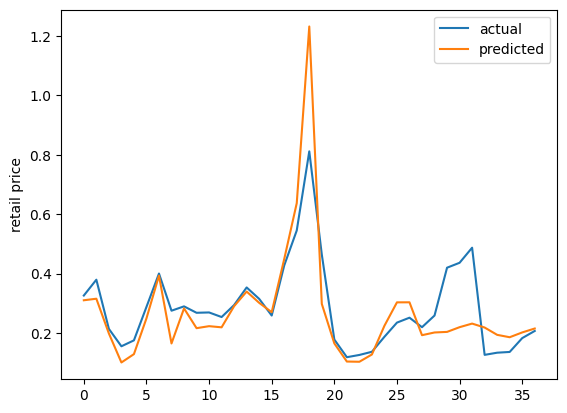

In [124]:
# 원래값으로 역스케일링한 값으로 그래프 그려보기.

plt.plot(y_test_inverse, label='actual')
plt.plot(y_pred_inverse, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


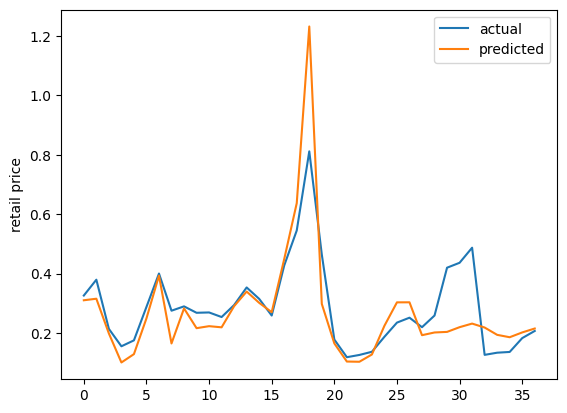

In [125]:
# 원래대로 스케일링한 값으로 그래프 그려보기.

y_pred = model.predict(X_test)
plt.plot(y_test_np, label='actual')
plt.plot(y_pred, label='predicted')

plt.ylabel('retail price')
plt.legend()
plt.show()

# 5. GRU

In [97]:
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.models import Sequential
from keras.optimizers import Adam

gru_model = Sequential()
gru_model.add(GRU(units=50, activation='tanh' ,input_shape=(4, 1)))
gru_model.add(Dense(50, activation='tanh'))
gru_model.add(Dropout(0.01))  
gru_model.add(Dense(1))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])
gru_model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,551 (41.21 KB)

 Trainable params: 10,551 (41.21 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# 모델 학습
gru = gru_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=2)

Epoch 1/500
9/9 - 2s - 260ms/step - loss: 0.0523 - mae: 0.1558 - val_loss: 0.0155 - val_mae: 0.0930
Epoch 2/500
9/9 - 0s - 8ms/step - loss: 0.0263 - mae: 0.1297 - val_loss: 0.0116 - val_mae: 0.0900
Epoch 3/500
9/9 - 0s - 8ms/step - loss: 0.0201 - mae: 0.1162 - val_loss: 0.0126 - val_mae: 0.0845
Epoch 4/500
9/9 - 0s - 9ms/step - loss: 0.0192 - mae: 0.1023 - val_loss: 0.0130 - val_mae: 0.0837
Epoch 5/500
9/9 - 0s - 8ms/step - loss: 0.0181 - mae: 0.1016 - val_loss: 0.0082 - val_mae: 0.0764
Epoch 6/500
9/9 - 0s - 8ms/step - loss: 0.0170 - mae: 0.0981 - val_loss: 0.0079 - val_mae: 0.0729
Epoch 7/500
9/9 - 0s - 8ms/step - loss: 0.0138 - mae: 0.0941 - val_loss: 0.0070 - val_mae: 0.0702
Epoch 8/500
9/9 - 0s - 8ms/step - loss: 0.0133 - mae: 0.0921 - val_loss: 0.0068 - val_mae: 0.0674
Epoch 9/500
9/9 - 0s - 7ms/step - loss: 0.0124 - mae: 0.0868 - val_loss: 0.0077 - val_mae: 0.0670
Epoch 10/500
9/9 - 0s - 9ms/step - loss: 0.0106 - mae: 0.0806 - val_loss: 0.0064 - val_mae: 0.0616
Epoch 11/500
9/9 

In [99]:
y_train_np = y_train.values
y_test_np = y_test.values

scaler = MinMaxScaler()
scaler.fit(y_train_np.reshape(-1, 1))

# gru 모델로 예측
gru_y_pred = gru_model.predict(X_test).flatten()

# 역스케일링
gru_y_pred_inverse = scaler.inverse_transform(gru_y_pred.reshape(-1,1))
gru_y_test_inverse = scaler.inverse_transform(y_test_np.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [100]:
# 평가치 구하기
gru_mape = (np.sum(np.abs(gru_y_test_inverse-gru_y_pred_inverse)/gru_y_test_inverse)/len(gru_y_test_inverse))*100
gru_mae = mean_absolute_error(y_test_np, gru_y_pred_inverse)
gru_rmse = np.sqrt(mean_squared_error(y_test_np, gru_y_pred_inverse))

gru_df = pd.DataFrame({'gru':[gru_mape, gru_mae, gru_rmse]}, index=['mape','mae','rmse'])
gru_df

,gru
mape,20.431375
mae,0.062216
rmse,0.102683


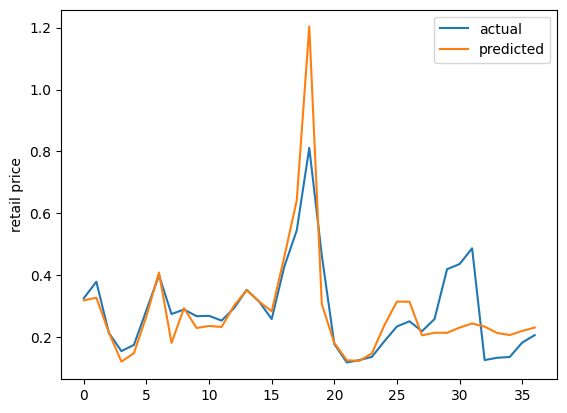

In [101]:
# 원래값으로 역스케일링한 값으로 그래프 그려보기.

plt.plot(gru_y_test_inverse, label='actual')
plt.plot(gru_y_pred_inverse, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

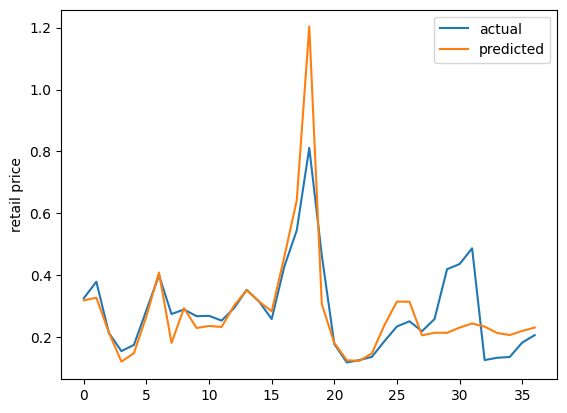

In [102]:
# 원래대로 스케일링한 값으로 그래프 그려보기.

plt.plot(y_test_np, label='actual')
plt.plot(gru_y_pred, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

# 6. RNN

In [103]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', input_shape=(4, 1)))
rnn_model.add(Dense(50, activation='tanh'))
rnn_model.add(Dropout(0.01))  
rnn_model.add(Dense(1))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
rnn_model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])
rnn_model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,201 (20.32 KB)

 Trainable params: 5,201 (20.32 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# 모델 학습
rnn = rnn_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=2)

Epoch 1/500
9/9 - 2s - 229ms/step - loss: 0.0529 - mae: 0.1781 - val_loss: 0.0523 - val_mae: 0.2043
Epoch 2/500
9/9 - 0s - 9ms/step - loss: 0.0222 - mae: 0.1234 - val_loss: 0.0116 - val_mae: 0.0899
Epoch 3/500
9/9 - 0s - 9ms/step - loss: 0.0172 - mae: 0.0866 - val_loss: 0.0090 - val_mae: 0.0763
Epoch 4/500
9/9 - 0s - 8ms/step - loss: 0.0093 - mae: 0.0745 - val_loss: 0.0102 - val_mae: 0.0845
Epoch 5/500
9/9 - 0s - 8ms/step - loss: 0.0060 - mae: 0.0597 - val_loss: 0.0092 - val_mae: 0.0708
Epoch 6/500
9/9 - 0s - 9ms/step - loss: 0.0047 - mae: 0.0457 - val_loss: 0.0083 - val_mae: 0.0658
Epoch 7/500
9/9 - 0s - 9ms/step - loss: 0.0034 - mae: 0.0428 - val_loss: 0.0091 - val_mae: 0.0624
Epoch 8/500
9/9 - 0s - 9ms/step - loss: 0.0033 - mae: 0.0390 - val_loss: 0.0100 - val_mae: 0.0639
Epoch 9/500
9/9 - 0s - 8ms/step - loss: 0.0038 - mae: 0.0409 - val_loss: 0.0104 - val_mae: 0.0632
Epoch 10/500
9/9 - 0s - 8ms/step - loss: 0.0039 - mae: 0.0408 - val_loss: 0.0110 - val_mae: 0.0652
Epoch 11/500
9/9 

In [105]:
y_train_np = y_train.values
y_test_np = y_test.values

scaler = MinMaxScaler()
scaler.fit(y_train_np.reshape(-1, 1))

# gru 모델로 예측
rnn_y_pred = rnn_model.predict(X_test).flatten()

# 역스케일링
rnn_y_pred_inverse = scaler.inverse_transform(rnn_y_pred.reshape(-1,1))
rnn_y_test_inverse = scaler.inverse_transform(y_test_np.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [106]:
# 평가치 구하기
rnn_mape = (np.sum(np.abs(rnn_y_test_inverse-rnn_y_pred_inverse)/rnn_y_test_inverse)/len(rnn_y_test_inverse))*100
rnn_mae = mean_absolute_error(y_test_np, rnn_y_pred_inverse)
rnn_rmse = np.sqrt(mean_squared_error(y_test_np, rnn_y_pred_inverse))

rnn_df = pd.DataFrame({'rnn':[rnn_mape, rnn_mae, rnn_rmse]}, index=['mape','mae','rmse'])
rnn_df

,rnn
mape,19.553356
mae,0.061208
rmse,0.095465


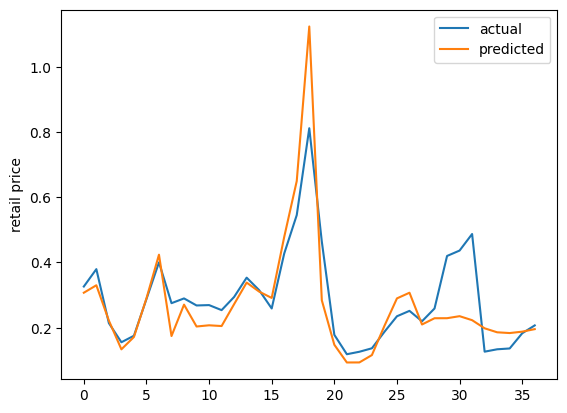

In [107]:
# 원래값으로 역스케일링한 값으로 그래프 그려보기.

plt.plot(rnn_y_test_inverse, label='actual')
plt.plot(rnn_y_pred_inverse, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

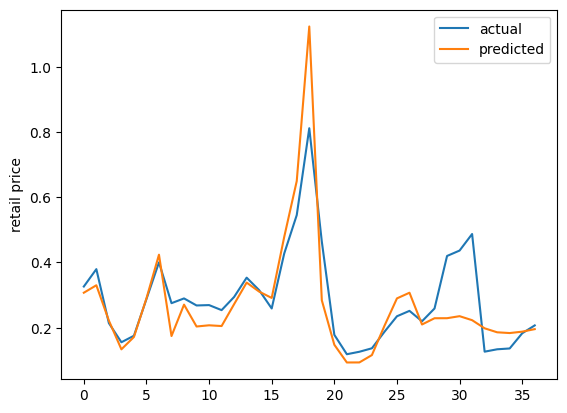

In [108]:
# 원래대로 스케일링한 값으로 그래프 그려보기.

plt.plot(y_test_np, label='actual')
plt.plot(rnn_y_pred, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()